# **Notas**
## **Alunos:**
    **Leydson Barros**    
    **Leandro Damaceno**


---



> https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1



# --**Brazilian Cities**--


1.   Classificação: Ouro
2.   Usabilidade: 10





> https://www.kaggle.com/datasets/crisparada/brazilian-cities


# --**Importações bibliotecas**-- 

In [1]:
import numpy as np
import pandas as pd
from numpy import log10
import matplotlib.pyplot as plt
%matplotlib inline

# **Base de dados** 

In [2]:

df_brazil=pd.read_csv("datas\BRAZIL_CITIES_REV2022.CSV",sep=",")
df_dictionary=pd.read_csv("datas\Data_Dictionary.csv",sep=";")

# ***Especificação***
## 1. **Coletar	dados ok**
## 2.	**Realizar pré-processamento	dos	dados**	


*   Definição	de	tipos
*   Tratamento	de	dados	ausentes
*   Normalização	e	discretização
*   Limpeza	de	dados	(univariado,	bivariado	e	
multivariado)
## 3.	**Apresentar estatísticas descritivas	dos	dados com	visualizações** 
## 4.	**Realizar teste	de	hipóteses para comparação de	valores	de	categorias	(ex.	preço	m2 em diferentes bairros)	e	visualizar diferenças**


# **Bônus:**


*   Integrar	dados	ou extrair	dados	da	Web
*   Utilizar técnicas não cobertas nas aula


# **Regiões do Brasil** 

In [ ]:
df_brazil.info()

In [ ]:
df_brazil.boxplot(column=['IDHM'])

In [ ]:
df_brazil.loc[(df_brazil['IDHM'] < 0.5)][['CITY','STATE','IDHM']]

In [ ]:
df_brazil.loc[(df_brazil['IDHM'] ==  1) | (df_brazil['IDHM'] > 0.6)][['CITY','STATE','IDHM']]

In [ ]:
# Criando os dataframes por região

nordeste = df_brazil.loc[(df_brazil['STATE'] == 'PE') | (df_brazil['STATE'] == 'MA') | (df_brazil['STATE'] == 'RN') | (df_brazil['STATE'] == 'BA') | (df_brazil['STATE'] == 'CE') | (df_brazil['STATE'] == 'AL') | (df_brazil['STATE'] == 'PI') | (df_brazil['STATE'] == 'PB') | (df_brazil['STATE'] == 'SE')]
norte =  df_brazil.loc[(df_brazil['STATE'] == 'AC') | (df_brazil['STATE'] == 'AP') | (df_brazil['STATE'] == 'AM') | (df_brazil['STATE'] == 'PA') | (df_brazil['STATE'] == 'RO') | (df_brazil['STATE'] == 'RR') | (df_brazil['STATE'] == 'TO')]
sul = df_brazil.loc[(df_brazil['STATE'] == 'PR') | (df_brazil['STATE'] == 'RS') | (df_brazil['STATE'] == 'SC')]
centroOeste =  df_brazil.loc[(df_brazil['STATE'] == 'DF') | (df_brazil['STATE'] == 'GO') | (df_brazil['STATE'] == 'MT') | (df_brazil['STATE'] == 'MS')]
sudeste = df_brazil.loc[(df_brazil['STATE'] == 'ES') | (df_brazil['STATE'] == 'MG') | (df_brazil['STATE'] == 'SP') | (df_brazil['STATE'] == 'RJ')]
# Verificação dos estados 
checknordeste = ['PE','BA', 'MA','PI','CE','RN','PB','AL','SE']
checknorte = ['AC','AP', 'AM','PA','RO','RR','TO']
checksul = ['PR','RS', 'SC']
checkcentroOeste = ['DF','GO', 'MT','MS']
checksudeste = ['ES','MG', 'SP','RJ']
# Verificação das cidades por estado
cidadesNordeste = df_brazil["STATE"].isin(checknordeste)
cidadesNorte = df_brazil["STATE"].isin(checknorte)
cidadesSul = df_brazil["STATE"].isin(checksul)
cidadesCentroOeste = df_brazil["STATE"].isin(checkcentroOeste)
cidadesSudeste = df_brazil["STATE"].isin(checksudeste)

In [ ]:
# Mapa do Brasil 

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
#cap = df_brazil.loc[df_brazil['CAPITAL'] == 1 & df_brazil["STATE"].isin(nordeste) ]

#cidadesNordeste = nordeste["STATE"].isin(checknordeste)
## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#000000')
plt.scatter(df_brazil[long&lat&cidadesNorte]["LONG"], df_brazil[long&lat&cidadesNorte]["LAT"], s=5, alpha=1, label='NORTE', c ='#006400')
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Nordeste', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&cidadesCentroOeste]["LONG"], df_brazil[long&lat&cidadesCentroOeste]["LAT"], s=5, alpha=1, label='Centro Oeste', c ='#DB7093')
plt.scatter(df_brazil[long&lat&cidadesSul]["LONG"], df_brazil[long&lat&cidadesSul]["LAT"], s=5, alpha=1, label='SUL', c ='#9932CC')
plt.scatter(df_brazil[long&lat&cidadesSudeste]["LONG"], df_brazil[long&lat&cidadesSudeste]["LAT"], s=5, alpha=1, label='Sudeste', c ='#FF4500')
#plt.scatter(df_brazil[long&lat&~cidadesNordeste]["LONG"], df_brazil[long&lat&~cidadesNordeste]["LAT"], s=1, alpha=1, c = '#4b0082')
plt.legend()
plt.show()

In [ ]:
# Mapa do Brasil Capitais

long= df_brazil["LONG"] != 0
lat = df_brazil["LAT"] !=0 
cap = df_brazil['CAPITAL'] ==1
 
## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.scatter(df_brazil[long&lat&~cap]["LONG"], df_brazil[long&lat&~cap]["LAT"], s=1, alpha=1, label='cidades', c = '#32cd32')
plt.legend()
plt.show()

# **Índice de Desenvolvimento Humano** 

In [ ]:
# Mapa do Nordeste

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Nordeste', c ='#00BFFF')
plt.legend()
plt.show()

In [ ]:
nordeste.boxplot(column=['IDHM'])

In [ ]:
# Criando lista
dados =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM.mean()}
Estados = list(dados.keys())
MediaIDHM = list(dados.values())
fig = plt.figure(figsize = (10, 5))

# criando Gráfico
plt.bar(Estados, MediaIDHM, color ='#00BFFF',width = 0.4)
plt.xlabel("Estados")
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Nordeste")
plt.show()

# **Pernambuco**

In [ ]:
nordeste.loc[(nordeste['STATE'] == "PE")].head()

In [ ]:
nordeste.loc[(nordeste['STATE'] == "PE")].boxplot(column=['IDHM'])

In [ ]:
histPE=nordeste[nordeste['STATE'] == "PE"]['IDHM'].hist()

In [ ]:
#Quantidades de cidades de Pernambuco
nordeste.loc[(nordeste['STATE'] == "PE")]['CITY'].count()

In [ ]:
#Quantidade de Habitantes
nordeste.loc[(nordeste['STATE'] == "PE")]['IBGE_RES_POP'].sum()

In [ ]:
#Rankim IDHM PE

nordeste.loc[(nordeste['STATE'] == "PE")]['IDHM Ranking 2010'].hist()

In [ ]:
nordeste.loc[(nordeste['IDHM'] <= 0.5) & (nordeste['STATE'] == "PE")][['CITY','STATE','IDHM']]

In [ ]:
#As 10 cidades com IDHM maior 
nordeste.loc[(nordeste['IDHM'] >= 0.650) & (nordeste['STATE'] == "PE")][['CITY','STATE','IDHM','IBGE_RES_POP','GDP','COMP_TOT']].sort_values('IDHM', ascending=False).head(10)

In [ ]:
# Criando lista
dados =  {'Agriculture':nordeste[nordeste['STATE'] == 'PE'].COMP_A.sum()/1000,'Indústrias extrativas':nordeste[nordeste['STATE'] == 'PE'].COMP_B.sum()/1000,'Indústrias de transformação':nordeste[nordeste['STATE'] == 'PE'].COMP_C.sum()/1000,'Eletricidade e gás':nordeste[nordeste['STATE'] == 'PE'].COMP_D.sum()/1000,'Saneamento':nordeste[nordeste['STATE'] == 'PE'].COMP_E.sum()/1000,'Construção':nordeste[nordeste['STATE'] == 'PE'].COMP_F.sum()/1000,'Automobilística':nordeste[nordeste['STATE'] == 'PE'].COMP_G.sum()/1000,'Transporte':nordeste[nordeste['STATE'] == 'PE'].COMP_H.sum()/1000,'Hospedagem e alimentação':nordeste[nordeste['STATE'] == 'PE'].COMP_I.sum()/1000,'Informação e comunicação':nordeste[nordeste['STATE'] == 'PE'].COMP_J.sum()/1000,'Atividades financeiras':nordeste[nordeste['STATE'] == 'PE'].COMP_K.sum()/1000,'Atividades imobiliárias':nordeste[nordeste['STATE'] == 'PE'].COMP_L.sum()/1000,'Científicas e Técnicas':nordeste[nordeste['STATE'] == 'PE'].COMP_M.sum()/1000,'atividades administrativas':nordeste[nordeste['STATE'] == 'PE'].COMP_N.sum()/1000,'Administração e Segurança':nordeste[nordeste['STATE'] == 'PE'].COMP_O.sum()/1000,'Educação':nordeste[nordeste['STATE'] == 'PE'].COMP_P.sum()/1000,'Saúde':nordeste[nordeste['STATE'] == 'PE'].COMP_Q.sum()/1000,'Cultura':nordeste[nordeste['STATE'] == 'PE'].COMP_R.sum()/1000,'Outras':nordeste[nordeste['STATE'] == 'PE'].COMP_S.sum()/1000,'Serviços domésticos':nordeste[nordeste['STATE'] == 'PE'].COMP_T.sum()/1000,'Internacional':nordeste[nordeste['STATE'] == 'PE'].COMP_U.sum()/1000}
Industria = list(dados.keys())
qtd = list(dados.values())
fig = plt.figure(figsize = (20, 10))

# criando Gráfico
plt.bar(Industria, qtd, color ='#00BFFF',width = 0.9)
plt.xticks(rotation = 50)
plt.xlabel("Áreas")
plt.ylabel("Quantidades")
plt.title("Indústrias")
plt.show()

# **----------------------------------------------------------------------------** 

# **Leandro aqui**

In [ ]:
df_brazil.describe()

In [3]:
#  Eliminando linhas duplicadas, Cidades: Assis, Paraty e Nova Fátima
df_brazil = df_brazil.drop_duplicates()

In [4]:
# Cidade de Paraty possui dois dados sobre a agência de correios, eliminei o diferente de 1 (pesquisado no google que só existe uma agência)
df_brazil.drop(df_brazil.loc[(df_brazil['CITY']=='Paraty') & (df_brazil['POST_OFFICES'] != 1)].index, inplace=True)

In [ ]:
# gráfico mostrando que só há uber na área urbana
df_brazil.groupby('RURAL_URBAN')['UBER'].sum().plot(kind='bar',figsize=(5,5))

In [ ]:
#Porcentagem correpondente de cada tipologia

df_brazil.groupby(['RURAL_URBAN']).size().plot(kind='pie', autopct='%0.2f%%', figsize=(10,10))

In [5]:
# De acordo com o IBGE a menor cidade do Brasil tem 3565 km², dando o código abaixo , retona 3 cidades com área 0
df_brazil[(df_brazil['AREA'] < 3.565)]
df_brazil.drop(df_brazil.loc[(df_brazil['AREA'] <  3565)].index, inplace=True)

In [6]:
# De acordo com o IBGE a  cidade do Brasil menos povoada tem 776 pessoas
df_brazil[(df_brazil['IBGE_RES_POP'] < 776)]
df_brazil.drop(df_brazil.loc[(df_brazil['IBGE_RES_POP']< 3.565)].index, inplace=True)

In [7]:
df_brazil['TAXES'].value_counts()

4075      2
7582      2
17178     1
563433    1
6049      1
         ..
75341     1
1586      1
47213     1
141025    1
24377     1
Name: TAXES, Length: 424, dtype: int64

In [8]:
df_brazil['TAXES'].describe()

count    4.260000e+02
mean     2.129235e+05
std      1.595879e+06
min      5.910000e+02
25%      6.292750e+03
50%      2.008100e+04
75%      6.898725e+04
max      2.914558e+07
Name: TAXES, dtype: float64

<AxesSubplot:>

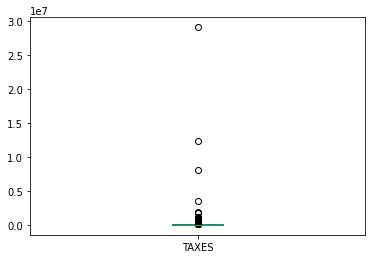

In [9]:
df_brazil['TAXES'].plot.box()

<AxesSubplot:>

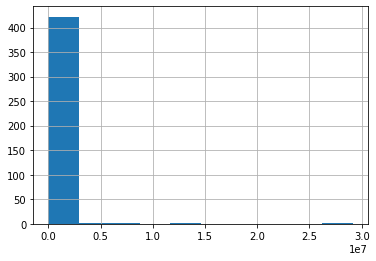

In [10]:
df_brazil['TAXES'].hist()

<AxesSubplot:>

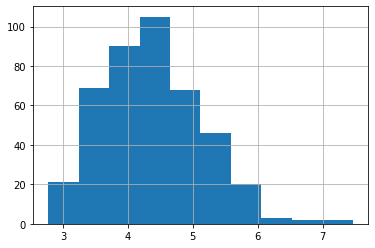

In [11]:
 # Como visto em cima , os dados não estão simétricos , então aplicamos log10
 df_brazil['TAXES_Log'] = log10(df_brazil['TAXES'])
 df_brazil['TAXES_Log'].hist()

In [12]:
# Usando z-core robusto
from numpy import abs
mad = abs(df_brazil['TAXES_Log'] - df_brazil['TAXES_Log'].median()).median()*(1/0.6745)
print(mad)

0.7598219750170238


<AxesSubplot:>

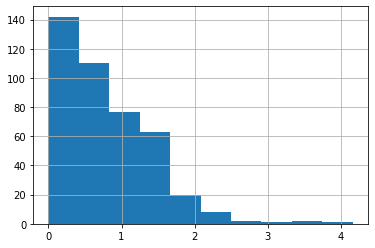

In [13]:
# Agora vamos plotar o z-score robusto
(abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad).hist()

In [14]:
# Usando a limiar > 3.5, encontro os outliers
df_brazil[abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad > 2.5]

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,TAXES_Log
719,Brasília,DF,1,2570160,2564370,5790,774820,751558,23261,2450634,...,292093270172,8016164488595,1288107,211392,594,1,28,1,60,7.464573
933,Campo Grande,MS,1,786797,785017,1780,250542,247159,3383,765394,...,9588640536,122580555181,302311,169030,123,1,4,1,24,6.543740
2849,Manaus,AM,1,1802014,1798773,3241,461426,458959,2467,1760829,...,13996268907,232305730782,373985,192002,77,1,3,0,21,7.094584
3927,Porto Velho,RO,1,428527,427841,686,119755,109628,10126,387189,...,1888267091,16961139220,113792,108884,10,1,1,0,16,6.279349
5326,Uberaba,MG,0,295988,295644,344,96944,94685,2259,285743,...,3204456039,8100860683,122698,60104,27,1,3,1,11,6.227202
5327,Uberlândia,MG,0,604013,603274,739,196195,191137,5058,580561,...,32121822440,35931873949,247595,119057,391,1,4,1,22,6.904431


In [17]:
# Gerando novo dataframe, eliminando os outros
df_brazil = df_brazil[abs(df_brazil['TAXES_Log']-df_brazil['TAXES_Log'].median())/mad < 2.5]

<AxesSubplot:>

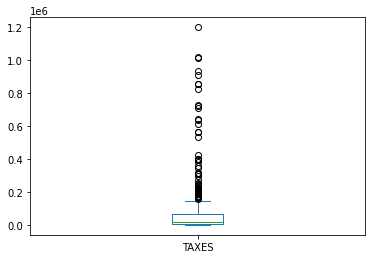

In [18]:
df_brazil['TAXES'].plot.box()